<a href="https://colab.research.google.com/github/Sarrah25/Shai-assignment/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<font color="red">**1-Installation des dépendances nécessaires**</font>


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


In [ ]:
!pip install transformers requests beautifulsoup4 pandas numpy

 **<font color="red">2-Importation des modules nécessaires</font>**


In [ ]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

 **<font color="red">3-Initialisation du tokenizer et du modèle pour l'analyse de sentiment :**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

 <font color="red"> **4-Encodage d'un texte donné et prédiction du sentiment :**

In [ ]:
tokens = tokenizer.encode('It was good but couldve been better. Great', return_tensors='pt')

In [ ]:
result = model(tokens)

 <font color="red"> **5. Interprétation de la sortie du modèle:**

In [ ]:
result.logits # Afficher les logits de sortie du modèle (scores non normalisés)

tensor([[-2.7768, -1.2353,  1.4419,  1.9804,  0.4584]],
       grad_fn=<AddmmBackward0>)

In [ ]:
int(torch.argmax(result.logits))+1 # Obtenir l'indice de classe avec le score le plus élevé (sentiment le plus probable)

4

<font color="blue">**6-Extraction des commentaires de la page Yelp pour un restaurant spécifique :**


In [ ]:

r = requests.get('https://www.yelp.com/biz/mejico-sydney-2')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex}) #Cette ligne utilise la méthode find_all de l'objet soup pour rechercher tous les paragraphes HTML (<p>) sur la page
reviews = [result.text for result in results]


In [ ]:
reviews[5]

"Don't come here expecting legit Mexican food but a modern twist on some staples. Loud party area, fun drinks and friendly staff make this a hip meeting area for large groups. Drinks were better than the food. They stuff the families toward the back but lack any amenities (no changing table) except a high chair. Service started off friendly but it took a while to get someone to take our order and then they forgot our dish which came out cold when we asked for it. Then we had to flag someone down to pay the bill. The watermelon salad was tasty but not complex, tossed with a few cucumbers and pistachios. The corn lollipops with spicy mayo sauce were probably the best dish. The beef empanadas were cold and average though the salsa was an interesting pickled onion. Definitely skip the octopus dish- it was dry, over cooked and lacked flavor though the presentation looked promising. It came with squares of polenta and dallops of potato mash with a dramatic squid ink streak across the dish bu

<font color="blue">**7-Création d'un DataFrame pandas à partir des commentaires extraits :**



In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame(np.array(reviews), columns=['review'])

**Calcul du score de sentiment pour le premier commentaire :**

In [ ]:
df['review'].iloc[0]

'The food is fresh and tasty.  The scallop ceviche started the lunch. The scallops were tender with a great acidity and use of mango and peppers. The steak was tender and I got the hint of tequila in the sauce. I enjoyed a watermelon salad that complimented the the steak. The portions are good, but a stretch if you are sharing. My only down point is the service. They really only showed up to present my next plate and never checked to see if I wanted another drink (which I did).Enjoyed the food.'

<font color="blue">**8-Définition de la fonction sentiment_score :**

In [ ]:
def sentiment_score(review): #Cette fonction prend un commentaire en entrée et retourne son score de sentiment
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [ ]:
sentiment_score(df['review'].iloc[1])

2

**Application de la fonction sentiment_score à chaque commentaire dans le DataFrame**

In [ ]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

**Affichage du DataFrame final contenant les commentaires et leurs scores de sentiment**

In [ ]:
df

,review,sentiment
0,The food is fresh and tasty. The scallop cevi...,4
1,The food was decent not great.. We had the gu...,2
2,"Food was okay, guacamole was below average. Se...",2
3,The food and service here was really good. It...,5
4,Visiting from Texas and decided to give this r...,5
5,Don't come here expecting legit Mexican food b...,3
6,Out of all the restaurants that I tried in Syd...,5
7,"Great atmosphere, attentive service, solid mar...",3
8,We came here on a Thursday night @ 5pm and by ...,4
9,Have been here twice and have absolutely loved...,5


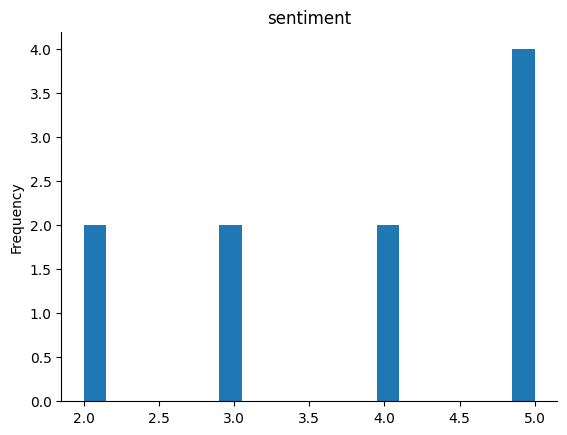

In [ ]:
# @title sentiment

from matplotlib import pyplot as plt
df['sentiment'].plot(kind='hist', bins=20, title='sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df['review'].iloc[1]

'The food was decent not great..  We had the guacamole which was bland and came with some type of plantain chips.. The chicken and steak tacos were good.. But the service was poor. We had a waitress with an attitude. She seemed upset whenever we asked for anything.  She would walk by and just stick up her hand and say " just wait ".  She spilled the ingredients to make the guacamole all over the table but never apologized. The waitress didn\'t come by at all, not even once to check on us.. I will not go back. Suggest you find a Mexican restaurant that really wants your business..'